In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
data = pd.read_excel('/content/Data_Solar Radiation.xlsx')
print(data.head())

         Unnamed: 0        Unnamed: 1 Input Variable Unnamed: 3 Unnamed: 4  \
0         From Date           To Date          PM2.5       PM10         NO   
1  01-01-2024 00:00  02-01-2024 00:00           65.1     107.53       2.37   
2  02-01-2024 00:00  03-01-2024 00:00          74.23     113.42       2.45   
3  03-01-2024 00:00  04-01-2024 00:00          81.83     123.53       2.59   
4  04-01-2024 00:00  05-01-2024 00:00          66.04     121.96       2.44   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11  \
0        NO2        NOx        NH3        SO2         CO  ...     Benzene   
1      19.85      12.48      10.43       9.05       0.61  ...        0.61   
2      21.28      13.27      10.18       8.89       0.64  ...         0.6   
3      22.27      13.92       9.86      11.25       0.69  ...        0.61   
4      25.01      14.56      10.09      10.85       0.69  ...        0.61   

  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unname

In [ ]:
data.columns = data.iloc[0]
data = data.drop(index=0).reset_index(drop=True)
data = data.drop(columns=["From Date", "To Date"])
data.dropna(inplace=True)

In [ ]:
print(data.columns)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD', 'BP', 'Xylene', 'AT',
       'SR'],
      dtype='object', name=0)


In [ ]:
y = data['SR'].values.reshape(-1, 1)
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

In [ ]:
X = []
y_final = []
window_size = 5

In [ ]:
X = []
y_final = []
window_size = 5

for i in range(window_size, len(y_scaled)):
    X.append(y_scaled[i-window_size:i, 0])
    y_final.append(y_scaled[i, 0])

# Convert X and y_final to NumPy arrays *after* the loop
X, y_final = np.array(X), np.array(y_final)

X_train, X_test, y_train, y_test = train_test_split(X, y_final, test_size=0.2, random_state=42, shuffle=False)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

fnn_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_fnn = fnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0662 - val_loss: 0.0076
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - val_loss: 0.0031
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - val_loss: 0.0034
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_l

In [ ]:
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0821 - val_loss: 0.0146
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197 - val_loss: 0.0083
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0091 - val_loss: 0.0040
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - val_loss: 0.0044
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - val_loss: 0.0042
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 - val_loss: 0.0040
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_

In [ ]:
y_pred_fnn = fnn_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test_rnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


In [ ]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_fnn_inv = scaler.inverse_transform(y_pred_fnn)
y_pred_rnn_inv = scaler.inverse_transform(y_pred_rnn)

In [ ]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate(y_test_inv, y_pred_fnn_inv, "Feedforward Neural Network")
evaluate(y_test_inv, y_pred_rnn_inv, "Recurrent Neural Network (LSTM)")

Feedforward Neural Network - RMSE: 29.35, MAE: 16.14
Recurrent Neural Network (LSTM) - RMSE: 28.08, MAE: 16.29


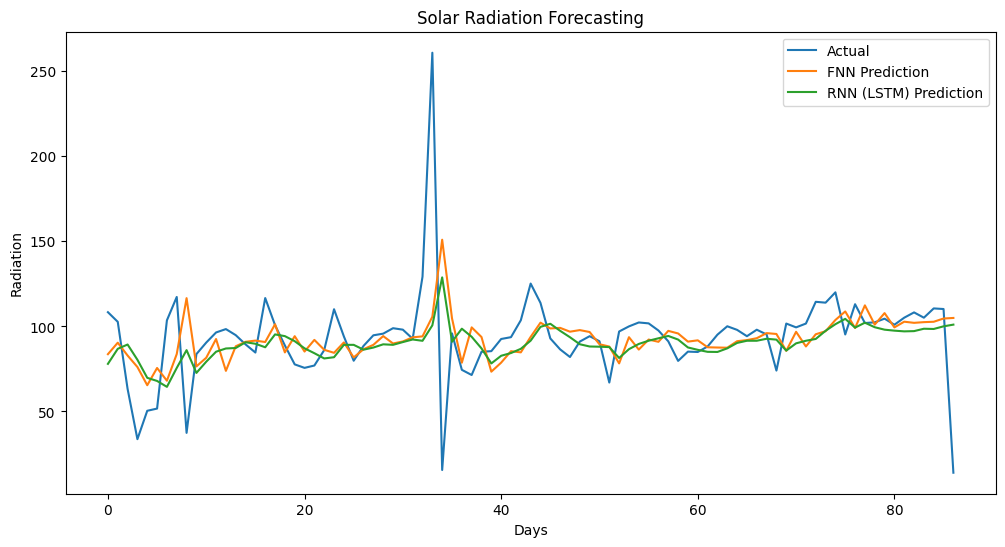

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_fnn_inv, label='FNN Prediction')
plt.plot(y_pred_rnn_inv, label='RNN (LSTM) Prediction')
plt.legend()
plt.title('Solar Radiation Forecasting')
plt.xlabel('Days')
plt.ylabel('Radiation')
plt.show()